# Tutorial <span style='color:red'>?</span>: DC magnetometry 

In this tutorial, the Ubermag micromagnetic simulation software is used to create 3-Dimensional magnetic structure, on which DC magnetometry can be performed. DC magnetometry is a measurement technique that enables the magnetic dipole moment of a sample to be measured. Magnetometers come in many varieties, such as Vibrating Sample Magnetometers and Superconducting Quantum Interference device magnetometers but these all have the ability to measure the samples magnetisation.

## Magnetometry Reference frame
In `mag2exp` the experimental reference for magnetometry is defined to be congruent as the sample reference frame.

## The micromagnetic simulation
A micromagnetic simulation can be set up using <code>Ubermag</code> to obtain a 3-Dimentional magntic structure.

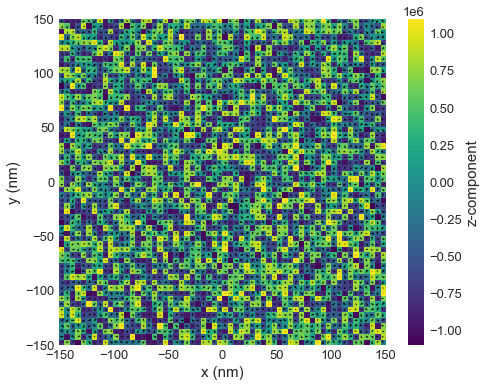

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
np.random.seed(1)

region = df.Region(p1=(-150e-9, -150e-9, 0), p2=(150e-9, 150e-9, 20e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=1.6e-11)
                 + mm.DMI(D=4e-3, crystalclass='T') 
                 + mm.CubicAnisotropy(K=1e6, u1=(0, 0, 1), u2=(0, 1, 0)) 
                 + mm.Demag()
                 + mm.Zeeman(H=(0, 0, 0.1)))

Ms = 1.1e6  # A/m

def m_fun(pos):
    return 2 * np.random.rand(3) - 1

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun, norm=Ms)
system.m.plane('z').mpl()

Relax the system and plot its magnetisation.

Running OOMMF (DockerOOMMFRunner) [2021/08/12 15:55]... (32.4 s)


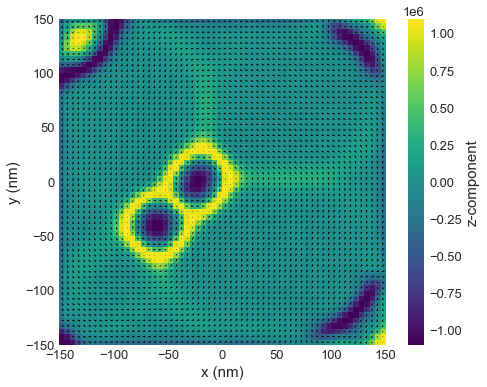

In [2]:
# NBVAL_IGNORE_OUTPUT
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

Now we have a magnetisation texture we can compute the magnetisation of the sample.

### DC Magnetisation

In [3]:
import mag2exp

In [4]:
mag2exp.magnetometry.magnetisation(system.m) 

(35994.24734870032, -110130.19396549849, 16241.465512545812)

In [5]:
%%capture
mag_arr = []
H_arr = []
for H in np.linspace(0,1000000,20):
    system.energy.zeeman.H= (0,0,H)
    md.drive(system)
    H_arr.append(H)
    mag_arr.append(mag2exp.magnetometry.magnetisation(system.m))

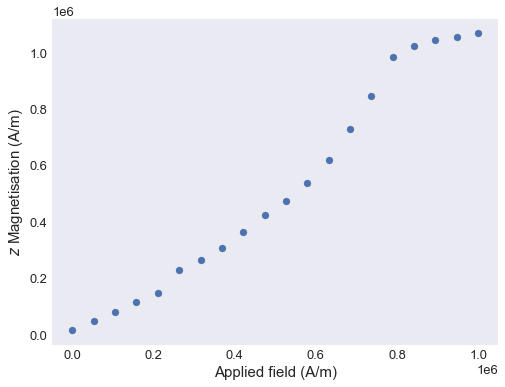

In [6]:
# NBVAL_IGNORE_OUTPUT
plt.scatter(H_arr, np.array(mag_arr)[:,2])
plt.ylabel(r'$z$ Magnetisation (A/m)')
plt.xlabel('Applied field (A/m)')
plt.show()